##**Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Import Packages**

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Embedding, Input, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
import matplotlib.pyplot as plt

##**Loading Dataset**

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/BTP/Files/train_data.csv", encoding='utf-8')
test_data = pd.read_csv("/content/drive/MyDrive/BTP/Files/test_data.csv", encoding='utf-8')
valid_data = pd.read_csv("/content/drive/MyDrive/BTP/Files/valid_data.csv", encoding='utf-8')

In [4]:
Y_train = train_data['label'].values
Y_test = test_data['label'].values
Y_valid = valid_data['label'].values

##**Vocab Builder**

In [5]:
#Splitting news based upon space
X_train_input = [str(d).split() for d in train_data['statement'].values]
X_test_input = [str(d).split() for d in test_data['statement'].values]
X_valid_input = [str(d).split() for d in valid_data['statement'].values]

# Tokenizing the splitted news based upon space
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_input)


vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index


X_train_input_seq = tokenizer.texts_to_sequences(X_train_input)
X_test_input_seq = tokenizer.texts_to_sequences(X_test_input)
X_valid_input_seq = tokenizer.texts_to_sequences(X_valid_input)

maxlen = 200

X_train_input_seq_padded = pad_sequences(X_train_input_seq,maxlen=maxlen)
X_test_input_seq_padded = pad_sequences(X_test_input_seq,maxlen=maxlen)
X_valid_input_seq_padded = pad_sequences(X_valid_input_seq,maxlen=maxlen)

##**Word Embeddings**

In [ ]:
# def load_fastext():
#   print('loading word embeddings...')
#   embeddings_index = {}
#   f = open('/content/drive/MyDrive/BTP/WordEmbeddings/cc.en.300.vec',encoding='utf-8')
#   for line in f:
#     values = line.strip().rsplit(' ')
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
#   f.close()
#   print('found %s word vectors' % len(embeddings_index))

#   return embeddings_index

# embeddings_index=load_fastext()


# embedding_matrix_fasttext = np.zeros((vocab_size, 300))
# for word, i in vocab.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         # words not found in embedding index will be all-zeros.
#         embedding_matrix_fasttext[i] = embedding_vector

loading word embeddings...
found 2000000 word vectors


##**Model**

In [6]:
csv_log = CSVLogger("/content/drive/MyDrive/BTP/Results/model1_results.csv")

filepath = '/content/drive/MyDrive/BTP/Results/my_best_model1.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

callbacks = [checkpoint, csv_log]

In [ ]:
# model = keras.Sequential(
#     [
#         Input(shape=(200,)),
#         Embedding(vocab_size,output_dim=300,weights=[embedding_matrix_fasttext],input_length=200),
#         Bidirectional(LSTM(units=500)),
#         Dense(64, activation='relu'),
#         Dropout(0.5),
#         Dense(16, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ]
#     )
# model.compile(loss = "binary_crossentropy", optimizer = 'adam',metrics=['accuracy'])
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          65356800  
                                                                 
 bidirectional (Bidirectiona  (None, 1000)             3204000   
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                64064     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                        

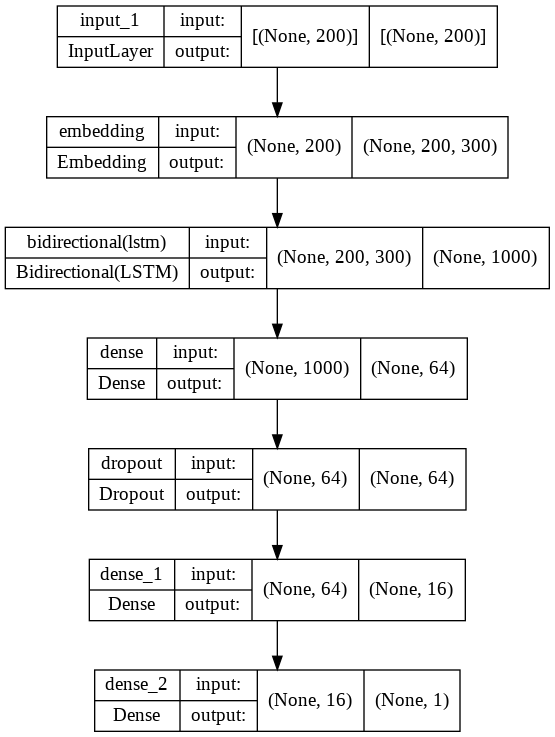

In [ ]:
# plot_model(model, show_shapes=True)

In [ ]:
# history = model.fit(x=X_train_input_seq_padded, y=Y_train, batch_size=64, epochs=25, validation_data=[X_valid_input_seq_padded,Y_valid] , callbacks=callbacks)

Epoch 1/25
756/756 [==============================] - ETA: 0s - loss: 0.3156 - accuracy: 0.8576
Epoch 1: val_accuracy improved from -inf to 0.88170, saving model to /content/drive/MyDrive/BTP/Results/my_best_model1.hdf5
756/756 [==============================] - 250s 318ms/step - loss: 0.3156 - accuracy: 0.8576 - val_loss: 0.2653 - val_accuracy: 0.8817
Epoch 2/25
756/756 [==============================] - ETA: 0s - loss: 0.2160 - accuracy: 0.9046
Epoch 2: val_accuracy did not improve from 0.88170
756/756 [==============================] - 238s 315ms/step - loss: 0.2160 - accuracy: 0.9046 - val_loss: 0.2640 - val_accuracy: 0.8757
Epoch 3/25
756/756 [==============================] - ETA: 0s - loss: 0.1554 - accuracy: 0.9312
Epoch 3: val_accuracy did not improve from 0.88170
756/756 [==============================] - 238s 315ms/step - loss: 0.1554 - accuracy: 0.9312 - val_loss: 0.3099 - val_accuracy: 0.8720
Epoch 4/25
756/756 [==============================] - ETA: 0s - loss: 0.0889 - ac

In [7]:
model = load_model(filepath)

In [8]:
score = model.evaluate(x=X_test_input_seq_padded,y= Y_test)
print(score)

720/720 [==============================] - 25s 25ms/step - loss: 0.2648 - accuracy: 0.8798
[0.264787882566452, 0.879812479019165]


In [9]:
score = model.evaluate(x=X_train_input_seq_padded,y= Y_train)
print(score)

1512/1512 [==============================] - 36s 24ms/step - loss: 0.2290 - accuracy: 0.9049
[0.22903144359588623, 0.9049381017684937]


In [10]:
test_predictions = model.predict(X_test_input_seq_padded)
train_predictions = model.predict(X_train_input_seq_padded)

In [11]:
train_pred = pd.DataFrame(train_predictions, columns = ['predictions'])
test_pred = pd.DataFrame(test_predictions, columns = ['predictions'])

In [12]:
train_pred.to_csv("/content/drive/MyDrive/BTP/Results/model1_train_pred.csv", encoding='utf-8', index = False)
test_pred.to_csv("/content/drive/MyDrive/BTP/Results/model1_test_pred.csv", encoding='utf-8', index = False)